In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import normaltest, shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt
import statsmodels.api as sm

# 1. Define the problem statement


In [66]:
print("Problem Statement:")
print("Jamboree aims to assist students in assessing their probability of admission to Ivy League colleges, considering the unique perspective of Indian applicants. By conducting a thorough analysis, we can help Jamboree understand the crucial factors impacting graduate admissions and provide predictive insights to determine an individual's admission chances based on various variables.")


Problem Statement:
Jamboree aims to assist students in assessing their probability of admission to Ivy League colleges, considering the unique perspective of Indian applicants. By conducting a thorough analysis, we can help Jamboree understand the crucial factors impacting graduate admissions and provide predictive insights to determine an individual's admission chances based on various variables.


# 2. Import the dataset and perform exploratory data analysis


In [67]:
data = pd.read_csv("data/Jamboree.csv")


* Drop irrelevant columns
* Check the shape of the dataset


In [68]:
data = data.drop(columns=["Serial No."])

print("\nDataset Shape:")
print(data.shape)


Dataset Shape:
(500, 8)


* Check the data types of each column

In [69]:
print("\nData Types:")
print(data.dtypes)


Data Types:
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object


* Comment on the range of attributes


In [70]:
print("\nAttribute Ranges:")
print(data.describe())


Attribute Ranges:
        GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit   
count  500.000000  500.000000         500.00000  
mean     8.576440    0.560000           0.72174  
std      0.604813    0.496884           0.14114  
min      6.800000    0.000000           0.34000  
25%      8.127500    0.000000           0.6300

* Display the statistical summary of the entire dataset


In [71]:
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
        GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit   
count  500.000000  500.000000         500.00000  
mean     8.576440    0.560000           0.72174  
std      0.604813    0.496884           0.14114  
min      6.800000    0.000000           0.34000  
25%      8.127500    0.000000           0.6

* Column Names

In [73]:
print("Column Names:")
data.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)
print(data.columns)

Column Names:
Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')


# 3. Non-graphical and graphical analysis for insights
* Univariate Analysis


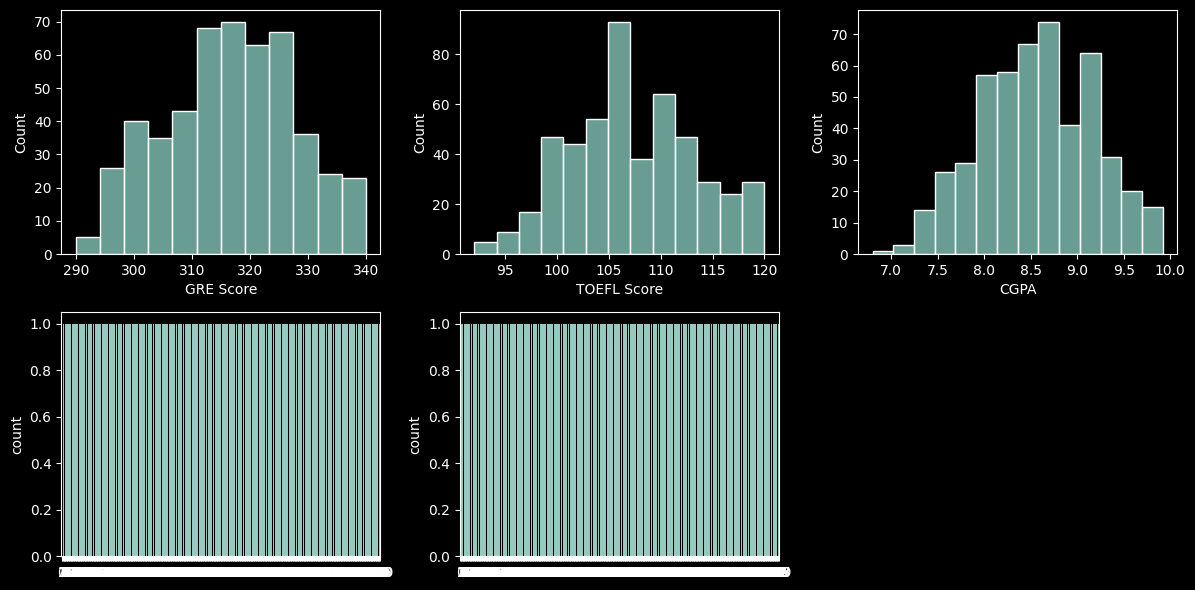

In [78]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.histplot(data["GRE Score"])
plt.subplot(2, 3, 2)
sns.histplot(data["TOEFL Score"])
plt.subplot(2, 3, 3)
sns.histplot(data["CGPA"])
plt.subplot(2, 3, 4)
sns.countplot(data["University Rating"])
plt.subplot(2, 3, 5)
sns.countplot(data["Research"])
plt.tight_layout()
plt.show()

* Bivariate Analysis


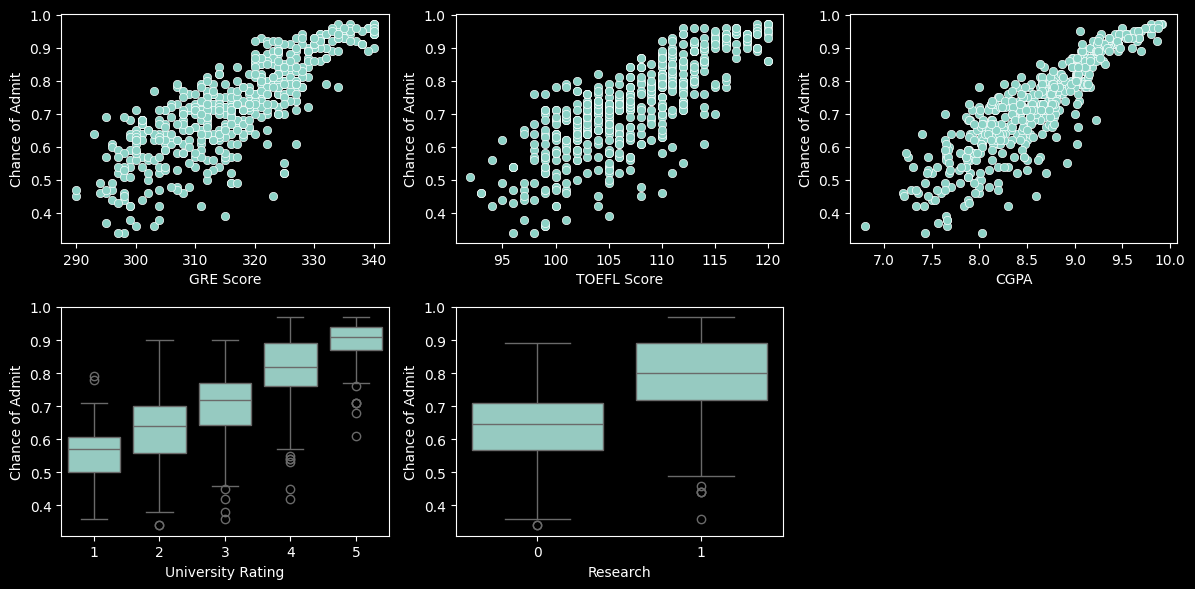

In [79]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.scatterplot(x="GRE Score", y="Chance of Admit", data=data)
plt.subplot(2, 3, 2)
sns.scatterplot(x="TOEFL Score", y="Chance of Admit", data=data)
plt.subplot(2, 3, 3)
sns.scatterplot(x="CGPA", y="Chance of Admit", data=data)
plt.subplot(2, 3, 4)
sns.boxplot(x="University Rating", y="Chance of Admit", data=data)
plt.subplot(2, 3, 5)
sns.boxplot(x="Research", y="Chance of Admit", data=data)
plt.tight_layout()
plt.show()

# 4. Data preprocessing
* Check for duplicate records


In [80]:
duplicates = data.duplicated()
print("\nNumber of Duplicate Records:", duplicates.sum())


Number of Duplicate Records: 0


* Check for missing values


In [81]:
missing_values = data.isnull().sum()
print("\nNumber of Missing Values:")
print(missing_values)


Number of Missing Values:
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


* Check for outlier values


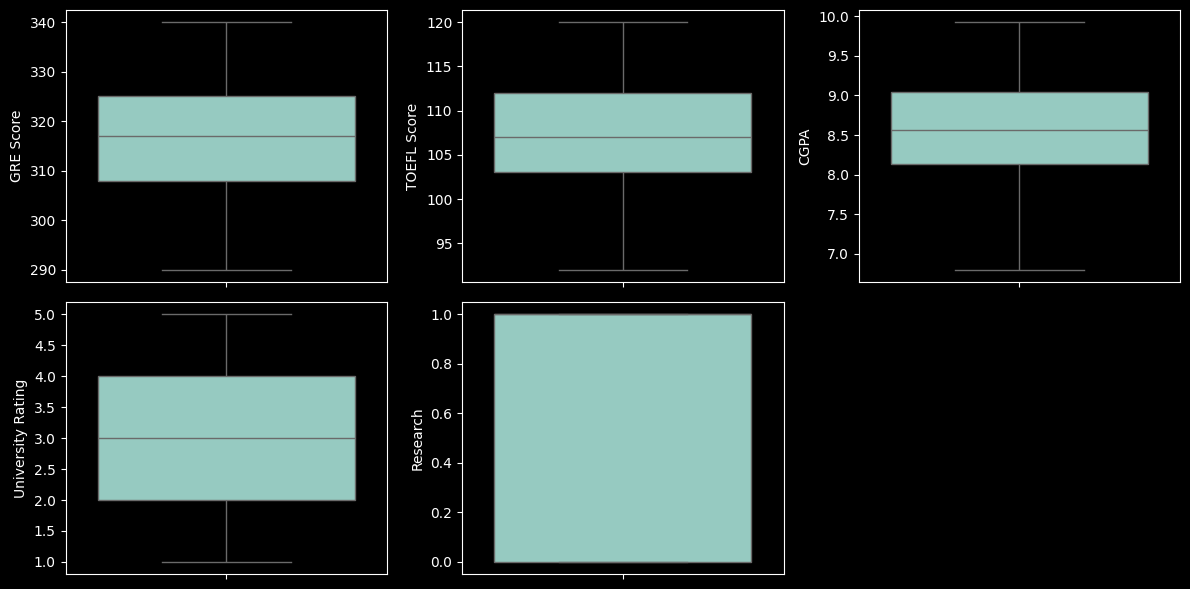

In [84]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.boxplot(data["GRE Score"])
plt.subplot(2, 3, 2)
sns.boxplot(data["TOEFL Score"])
plt.subplot(2, 3, 3)
sns.boxplot(data["CGPA"])
plt.subplot(2, 3, 4)
sns.boxplot(data["University Rating"])
plt.subplot(2, 3, 5)
sns.boxplot(data["Research"])
plt.tight_layout()
plt.show()

# 5. Check the correlation among independent variables


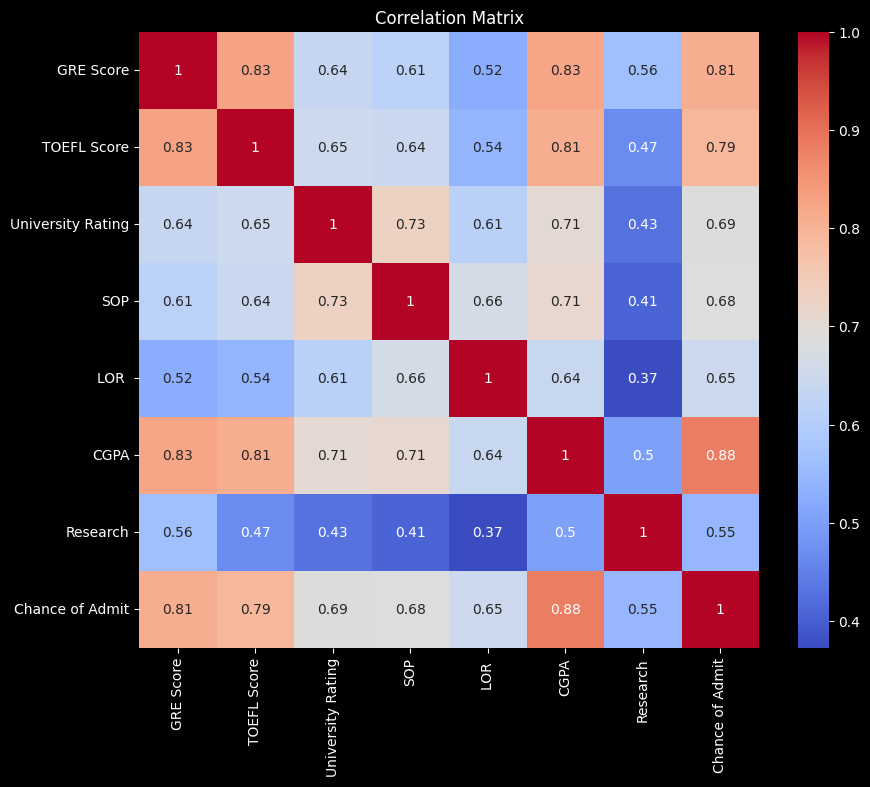

In [85]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# 6. Prepare the data for modeling


In [86]:
X = data.drop(columns=["Chance of Admit"])
y = data["Chance of Admit"]

* Perform the train-test split


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)



* Perform data normalization/standardization


In [88]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Build the Linear Regression model


In [61]:
model = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()
print("\nModel Summary:")
print(model.summary())


Model Summary:
                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     220.9
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          1.48e-122
Time:                        17:22:49   Log-Likelihood:                 512.81
No. Observations:                 400   AIC:                            -1012.
Df Residuals:                     393   BIC:                            -983.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    

In [63]:
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.params[:]})
print("\nModel Coefficients:")
print(coefficients)



Model Coefficients:
                 Feature  Coefficient
const          GRE Score     0.724175
x1           TOEFL Score     0.054280
x2     University Rating     0.033623
x3                   SOP     0.009356
x4                  LOR      0.011962
x5                  CGPA     0.025705
x6              Research     0.012125


* Use Linear Regression from sklearn

In [94]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()


* Display model coefficients with column names


In [93]:
print(f"Intercept: {model.intercept_}, R2 score: {model.score(X_test, y_test)}")
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("\nModel Coefficients:")
print(coefficients)

Intercept: -1.3835846437692005, R2 score: 0.8207166983513673

Model Coefficients:
             Feature  Coefficient
0          GRE Score     0.002279
1        TOEFL Score     0.002992
2  University Rating     0.003855
3                SOP     0.002585
4               LOR      0.016067
5               CGPA     0.113603
6           Research     0.023117



* Drop columns with p-value > 0.05 and re-train the model


In [95]:
significant_features = coefficients[coefficients["Coefficient"] < 0.05]["Feature"]
X_train_significant = X_train[significant_features]
X_test_significant = X_test[significant_features]


* Standarize the data

In [96]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_significant)
X_test_scaled = scaler.transform(X_test_significant)


* Update Model

In [97]:

model = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()
print("\nUpdated Model Summary:")
print(model.summary())



Updated Model Summary:
                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     233.6
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          4.14e-130
Time:                        17:37:20   Log-Likelihood:                 547.38
No. Observations:                 425   AIC:                            -1081.
Df Residuals:                     418   BIC:                            -1052.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7236      0

# 8. Test the assumptions of linear regression
* a. Multicollinearity check by VIF score

In [98]:
vif = pd.DataFrame()
vif["Feature"] = X_train_significant.columns
vif["VIF"] = [variance_inflation_factor(X_train_significant.values, i) for i in range(X_train_significant.shape[1])]
print("\nVIF Scores:")
print(vif)



VIF Scores:
             Feature          VIF
0          GRE Score   962.723957
1        TOEFL Score  1068.141952
2  University Rating    19.652743
3                SOP    33.468334
4               LOR     28.639345
5           Research     2.772419



* b. Mean of residuals should be close to zero


In [99]:
residuals = model.resid
print("\nMean of Residuals:", np.mean(residuals))



Mean of Residuals: -8.75116972351594e-17



* c. Linear relationship between independent & dependent variables


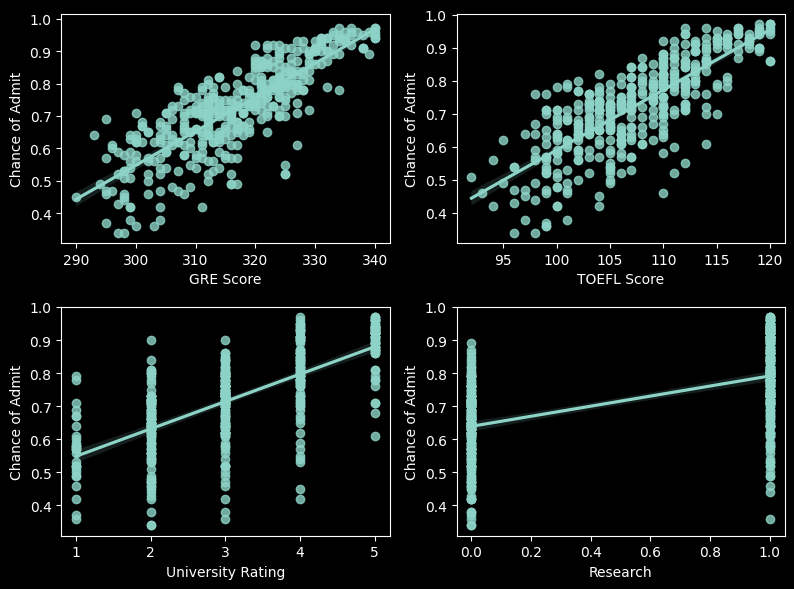

In [100]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.regplot(x=X_train_significant["GRE Score"], y=y_train)
plt.subplot(2, 3, 2)
sns.regplot(x=X_train_significant["TOEFL Score"], y=y_train)
plt.subplot(2, 3, 4)
sns.regplot(x=X_train_significant["University Rating"], y=y_train)
plt.subplot(2, 3, 5)
sns.regplot(x=X_train_significant["Research"], y=y_train)
plt.tight_layout()
plt.show()



* d. Test for Homoscedasticity


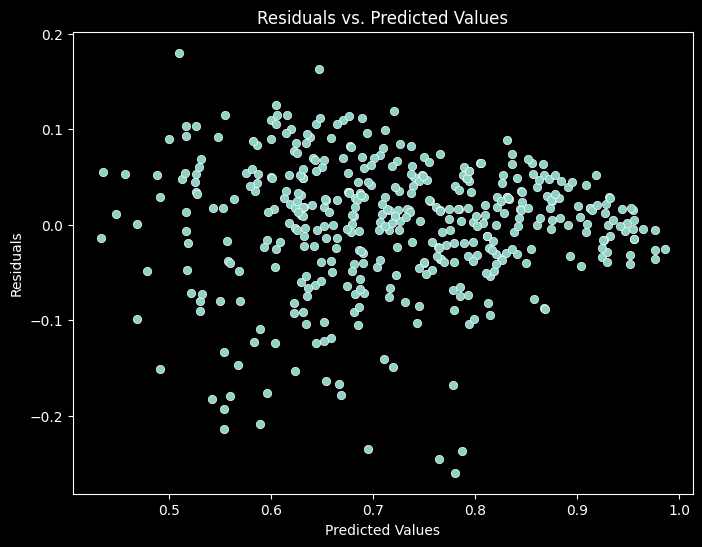


Goldfeld-Quandt Test p-value: 0.43391754812488764


In [103]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

_, p_value, _ = het_goldfeldquandt(model.resid, model.model.exog)
print("\nGoldfeld-Quandt Test p-value:", p_value)



* e. Normality of residuals


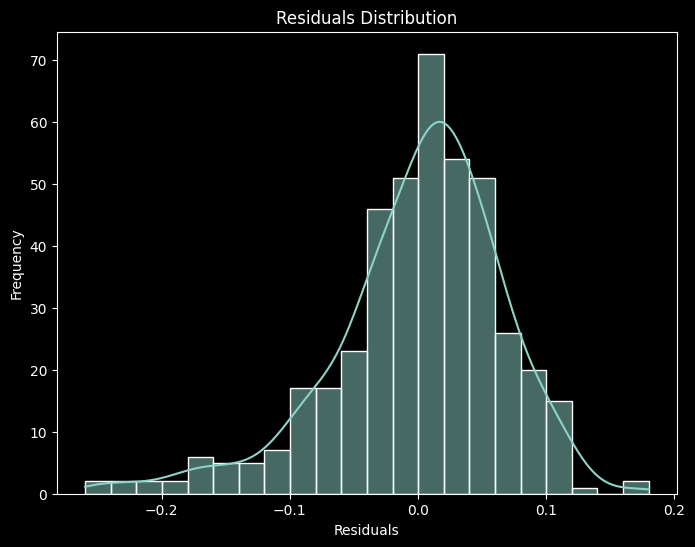


Shapiro-Wilk Test p-value: 2.2473481006760155e-10


In [104]:
plt.figure(figsize=(8, 6))
sns.histplot(model.resid, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

_, p_value = shapiro(model.resid)
print("\nShapiro-Wilk Test p-value:", p_value)


# 9. Evaluate the model's performance


In [105]:
y_pred = model.predict(sm.add_constant(X_test_scaled))

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)

print("\nModel Evaluation:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)


Model Evaluation:
MAE: 0.054592752671077396
RMSE: 0.0746855262873418
R-squared: 0.7524791332143407
Adjusted R-squared: 0.7306390567332531


# 10. Provide Actionable Insights & Recommendations


In [106]:
print("\nActionable Insights & Recommendations:")
print("- The significant factors impacting the chance of admission are GRE Score, TOEFL Score, CGPA, University Rating, and Research experience.")
print("- Students should focus on improving their GRE and TOEFL scores, as well as maintaining a high CGPA, to increase their chances of admission.")
print("- Applying to universities with higher ratings and having research experience can also positively influence the admission probability.")


Actionable Insights & Recommendations:
- The significant factors impacting the chance of admission are GRE Score, TOEFL Score, CGPA, University Rating, and Research experience.
- Students should focus on improving their GRE and TOEFL scores, as well as maintaining a high CGPA, to increase their chances of admission.
- Applying to universities with higher ratings and having research experience can also positively influence the admission probability.


# Analysis on Tips Data

In [119]:
import seaborn as sns
import pandas as pd
import numpy as np
df = sns.load_dataset('tips')
print(df.head())
# find the day when highest mean of total bill is recorded
df.groupby(['day', 'time'], observed=True)['total_bill'].mean().idxmax()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


('Sun', 'Dinner')

In [ ]:
# Mean tip vs sex bar plot on tips dataset
import seaborn as sns
import matplotlib.pyplot as plt


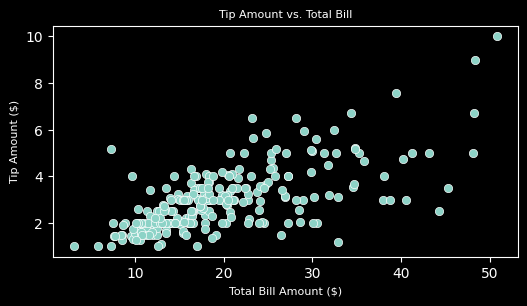

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset
tips = sns.load_dataset("tips")

# Create a scatter plot
plt.figure(figsize=(6, 3))
sns.scatterplot(x="total_bill", y="tip", data=tips)

# Add labels
plt.title("Tip Amount vs. Total Bill", fontsize=8)
plt.xlabel("Total Bill Amount ($)", fontsize=8)
plt.ylabel("Tip Amount ($)", fontsize=8)
plt.show()

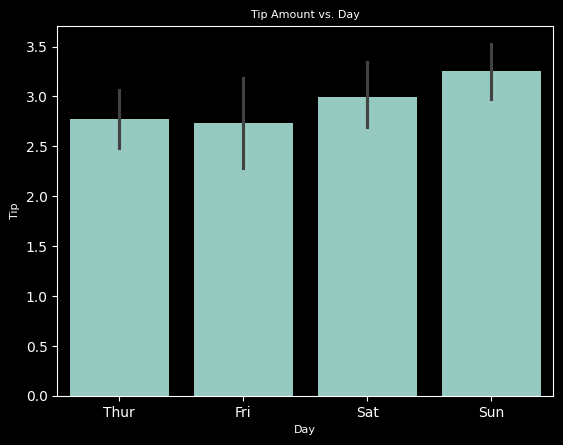

In [130]:

sns.barplot(x="day", y="tip", data=tips)
# Add labels
plt.title("Tip Amount vs. Day", fontsize=8)
plt.xlabel("Day", fontsize=8)
plt.ylabel("Tip", fontsize=8)
# Display the plot
plt.show()


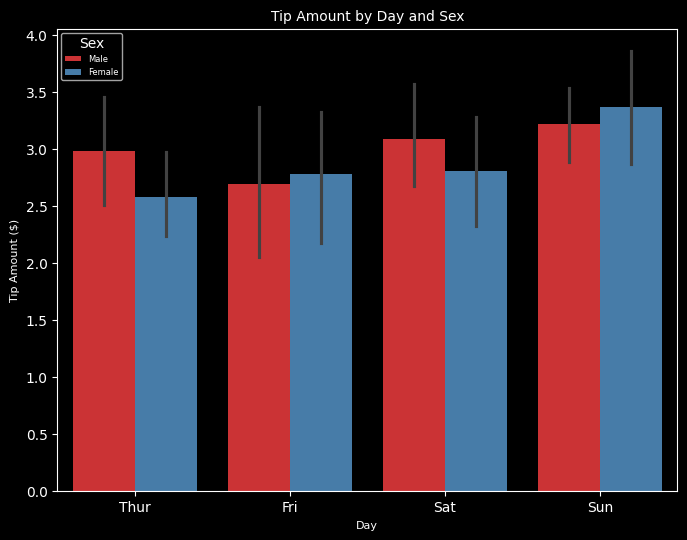

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a color bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x="day", y="tip", hue="sex", data=tips, palette="Set1")


# Add labels
plt.title("Tip Amount by Day and Sex", fontsize=10)
plt.xlabel("Day", fontsize=8)
plt.ylabel("Tip Amount ($)", fontsize=8)
plt.legend(title="Sex", fontsize=6)

# Display the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset
tips = sns.load_dataset("tips")

# Create a 3-count subplot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Subplot 1: Tip distribution by time
sns.barplot(x="time", y="tip", data=tips, ax=axes[0])
axes[0].set_title("Tip Distribution by Time", fontsize=14)
axes[0].set_xlabel("Time", fontsize=12)
axes[0].set_ylabel("Tip Amount ($)", fontsize=12)

# Subplot 2: Tip distribution by day
sns.barplot(x="day", y="tip", data=tips, ax=axes[1])
axes[1].set_title("Tip Distribution by Day", fontsize=14)
axes[1].set_xlabel("Day", fontsize=12)
axes[1].set_ylabel("Tip Amount ($)", fontsize=12)

# Subplot 3: Tip distribution by sex
sns.barplot(x="sex", y="tip", data=tips, ax=axes[2])
axes[2].set_title("Tip Distribution by Sex", fontsize=14)
axes[2].set_xlabel("Sex", fontsize=12)
axes[2].set_ylabel("Tip Amount ($)", fontsize=12)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plot
plt.show()
